In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np 
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.8.0
Keras Version: 2.8.0
GPU is available


In [3]:
# Display all the truncated items.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

C:\conda_tmp\ipykernel_25400\4206482429.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
# I purposefully placed multi-lined comments quotation to prevent it being running again as it will shuffle and create duplicated of the files in pokemon dataset.

'''
import splitfolders

input_folder='pokemon' #read from original dataset


#write to a new output of datasets
splitfolders.ratio(input_folder, output="pokemon_split",
            seed=42, ratio=(.65, .30, .05), group_prefix=None, move=False) 
            # Ratio parameters goes by (Train set, Validation Set, Test Set) Here I chose to have high number of Train set and Validation to train the model.
            # The test set is not by any means used for model training as we want to have a untouched data for our testing.
'''


Copying files: 255 files [00:01, 202.70 files/s]


In [5]:
train_path = 'pokemon_split\train'
val_path = 'pokemon_split\val'
test_path = 'pokemon_split\test' 

In [6]:

train_imagegen =  ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2, horizontal_flip = True,vertical_flip=True)
val_imagegen = ImageDataGenerator(rescale = 1./255)
test_imagegen = ImageDataGenerator(rescale = 1./255)



train_set = train_imagegen.flow_from_directory('pokemon_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')


val_set = val_imagegen.flow_from_directory('pokemon_split/val',
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

test_set = test_imagegen.flow_from_directory('pokemon_split/test',
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')                                                 

Found 165 images belonging to 5 classes.
Found 70 images belonging to 5 classes.
Found 15 images belonging to 5 classes.


# Transfer Learning

# Model 1
### Categorical_Crossentropy | Adam

In [7]:
# Importing VGG16 from keras with pre-trained weights that is trained on imagenet
from keras.applications.vgg16 import VGG16

# Define all image dimensions in the database.
img_height, img_width = 224,224

# I had set include_top = False as I do not want to use the final layer from the VGG16 pretrained model.
conv_base = VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

# Freeze pretrained-models to use as our base model. 
for layer in conv_base.layers:
  layer.trainable = False

# Output obtained on vgg16 is now flattened. 
x = Flatten()(conv_base.output) 

# Dense unit is set to 5 as there are 5 classes.
prediction = Dense(5, activation='softmax')(x) 

# Creating own layers in addition to VGG16 as the base layers.
model = Model(inputs=conv_base.input, outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
for i, layer in enumerate(conv_base.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: input_1 (False)
Layer 1: block1_conv1 (False)
Layer 2: block1_conv2 (False)
Layer 3: block1_pool (False)
Layer 4: block2_conv1 (False)
Layer 5: block2_conv2 (False)
Layer 6: block2_pool (False)
Layer 7: block3_conv1 (False)
Layer 8: block3_conv2 (False)
Layer 9: block3_conv3 (False)
Layer 10: block3_pool (False)
Layer 11: block4_conv1 (False)
Layer 12: block4_conv2 (False)
Layer 13: block4_conv3 (False)
Layer 14: block4_pool (False)
Layer 15: block5_conv1 (False)
Layer 16: block5_conv2 (False)
Layer 17: block5_conv3 (False)
Layer 18: block5_pool (False)


In [9]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(train_set, validation_data=val_set, epochs=20, batch_size=4)

Epoch 1/20
12/42 [=======>......................] - ETA: 3s - loss: 2.6123 - accuracy: 0.3125

C:\ProgramData\Anaconda3\envs\AIITP_Python08\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


42/42 [==============================] - 8s 151ms/step - loss: 2.1951 - accuracy: 0.4000 - val_loss: 1.4113 - val_accuracy: 0.5571
Epoch 2/20
42/42 [==============================] - 5s 116ms/step - loss: 1.3321 - accuracy: 0.5818 - val_loss: 2.0142 - val_accuracy: 0.4286
Epoch 3/20
42/42 [==============================] - 5s 115ms/step - loss: 1.0666 - accuracy: 0.6364 - val_loss: 1.3723 - val_accuracy: 0.5714
Epoch 4/20
42/42 [==============================] - 5s 121ms/step - loss: 1.0074 - accuracy: 0.7091 - val_loss: 1.0928 - val_accuracy: 0.6143
Epoch 5/20
42/42 [==============================] - 5s 119ms/step - loss: 0.7279 - accuracy: 0.7818 - val_loss: 1.3166 - val_accuracy: 0.5714
Epoch 6/20
42/42 [==============================] - 5s 118ms/step - loss: 0.4261 - accuracy: 0.8545 - val_loss: 0.9405 - val_accuracy: 0.7429
Epoch 7/20
42/42 [==============================] - 5s 116ms/step - loss: 0.7119 - accuracy: 0.7636 - val_loss: 0.8877 - val_accuracy: 0.7571
Epoch 8/20
42/42 

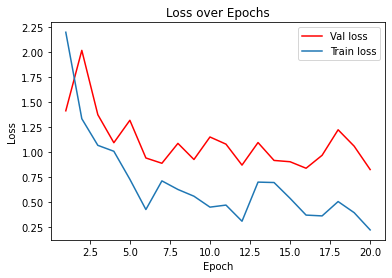

In [10]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history)
plt.savefig('Loss_CC_Adam_Model_01.jpg') 

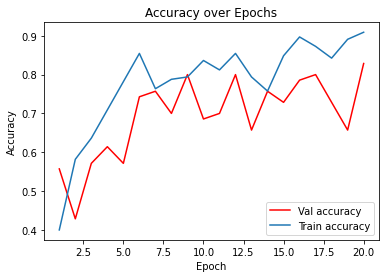

In [11]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history)
plt.savefig('Acc_CC_Adam_Model_01.jpg') 

In [12]:
model.save('pokemon_model_01.h5')

### Here I used pokemon_split/test/pikachu/00000187.jpg for testing.

In [50]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('pokemon_model_01.h5')

class_names=['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img_test = cv2.imread('pokemon_split/test/pikachu/00000187.jpg')
img_test = cv2.resize(img_test,(224,224))
img_test = np.reshape(img_test,[1,224,224,3])

classes = np.argmax(model.predict(img_test), axis = -1)
names = [class_names[i] for i in classes]

print ("Who's that Pokemon!?", names)
print ("It's in category", classes)


Who's that Pokemon!? ['Pikachu']
It's in category [3]


# Model 2
### Categorical_Crossentropy | rmsprop

In [15]:
# Importing VGG16 from keras with pre-trained weights that is trained on imagenet
from keras.applications.vgg16 import VGG16

# Define all image dimensions in the database.
img_height, img_width = 224,224

# I had set include_top = False as I do not want to use the final layer from the VGG16 pretrained model.
conv_base2 = VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

# Freeze pretrained-models to use as our base model. 
for layer in conv_base2.layers:
  layer.trainable = False

# Output obtained on vgg16 is now flattened. 
x = Flatten()(conv_base2.output) 

# Dense unit is set to 5 as there are 5 classes.
prediction = Dense(5, activation='softmax')(x) 

# Creating own layers in addition to VGG16 as the base layers.
model2 = Model(inputs=conv_base2.input, outputs=prediction)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
#Compile the model 
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
history2 = model2.fit(train_set, validation_data=val_set, epochs=20, batch_size=4)

Epoch 1/20
42/42 [==============================] - 6s 120ms/step - loss: 3.5827 - accuracy: 0.2485 - val_loss: 0.9535 - val_accuracy: 0.6571
Epoch 2/20
42/42 [==============================] - 5s 114ms/step - loss: 1.8181 - accuracy: 0.4485 - val_loss: 0.9575 - val_accuracy: 0.6857
Epoch 3/20
42/42 [==============================] - 5s 118ms/step - loss: 1.3783 - accuracy: 0.5879 - val_loss: 1.2828 - val_accuracy: 0.6000
Epoch 4/20
42/42 [==============================] - 5s 114ms/step - loss: 1.2332 - accuracy: 0.6424 - val_loss: 2.1901 - val_accuracy: 0.6286
Epoch 5/20
42/42 [==============================] - 5s 112ms/step - loss: 1.1996 - accuracy: 0.6667 - val_loss: 1.8464 - val_accuracy: 0.5857
Epoch 6/20
42/42 [==============================] - 5s 117ms/step - loss: 0.8491 - accuracy: 0.7394 - val_loss: 1.9969 - val_accuracy: 0.4571
Epoch 7/20
42/42 [==============================] - 5s 115ms/step - loss: 0.9221 - accuracy: 0.7273 - val_loss: 1.8901 - val_accuracy: 0.6429
Epoch 

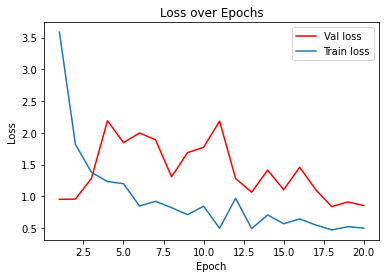

In [17]:
# Loss
def plot_loss(history2):
    train_loss = history2.history['loss']
    test_loss = history2.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history2)
plt.savefig('Loss_CC_rmsprop_Model_02.jpg') 

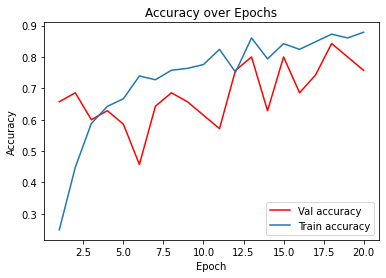

In [18]:
# Accuracies
def plot_accuracy(history2):
    train_acc = history2.history['accuracy']
    test_acc = history2.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history2)
plt.savefig('Acc_CC_rmsprop_Model_02.jpg') 

In [19]:
model2.save('pokemon_model_02.h5')

### Here I used pokemon_split/test/pikachu/00000187.jpg for testing.

In [49]:
from keras.models import load_model
import cv2
import numpy as np
model2 = load_model('pokemon_model_02.h5')

class_names2=['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img_test2 = cv2.imread('pokemon_split/test/pikachu/00000187.jpg')
img_test2 = cv2.resize(img_test2,(224,224))
img_test2 = np.reshape(img_test2,[1,224,224,3])

classes2 = np.argmax(model2.predict(img_test2), axis = -1)
names2 = [class_names2[i] for i in classes2]

print ("Who's that Pokemon!?", names2)
print ("It's in category", classes2)


Who's that Pokemon!? ['Pikachu']
It's in category [3]


# Model 3
### mean_squared_logarithmic_error | SGD

In [21]:
# Importing VGG16 from keras with pre-trained weights that is trained on imagenet
from keras.applications.vgg16 import VGG16

# Define all image dimensions in the database.
img_height, img_width = 224,224

# I had set include_top = False as I do not want to use the final layer from the VGG16 pretrained model.
conv_base3 = VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

# Freeze pretrained-models to use as our base model. 
for layer in conv_base3.layers:
  layer.trainable = False

# Output obtained on vgg16 is now flattened. 
x = Flatten()(conv_base3.output) 

# Dense unit is set to 5 as there are 5 classes.
prediction = Dense(5, activation='softmax')(x) 

# Creating own layers in addition to VGG16 as the base layers.
model3 = Model(inputs=conv_base3.input, outputs=prediction)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
#Compile the model 
model3.compile(loss='mean_squared_logarithmic_error', optimizer='SGD', metrics=['accuracy']) 
history3 = model3.fit(train_set, validation_data=val_set, epochs=120, batch_size=4)

Epoch 1/120
42/42 [==============================] - 5s 120ms/step - loss: 0.0943 - accuracy: 0.1939 - val_loss: 0.0970 - val_accuracy: 0.1857
Epoch 2/120
42/42 [==============================] - 5s 116ms/step - loss: 0.0874 - accuracy: 0.2545 - val_loss: 0.0868 - val_accuracy: 0.1857
Epoch 3/120
42/42 [==============================] - 5s 115ms/step - loss: 0.0852 - accuracy: 0.2667 - val_loss: 0.0854 - val_accuracy: 0.3286
Epoch 4/120
42/42 [==============================] - 5s 115ms/step - loss: 0.0767 - accuracy: 0.3818 - val_loss: 0.0956 - val_accuracy: 0.2286
Epoch 5/120
42/42 [==============================] - 5s 114ms/step - loss: 0.0760 - accuracy: 0.3818 - val_loss: 0.0769 - val_accuracy: 0.4000
Epoch 6/120
42/42 [==============================] - 5s 115ms/step - loss: 0.0682 - accuracy: 0.4303 - val_loss: 0.0673 - val_accuracy: 0.4143
Epoch 7/120
42/42 [==============================] - 5s 115ms/step - loss: 0.0671 - accuracy: 0.5030 - val_loss: 0.0652 - val_accuracy: 0.4571

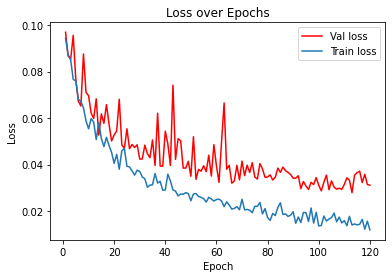

In [23]:
# Loss
def plot_loss(history3):
    train_loss = history3.history['loss']
    test_loss = history3.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history3)
plt.savefig('Loss_mlse_SGD_Model_03.jpg') 

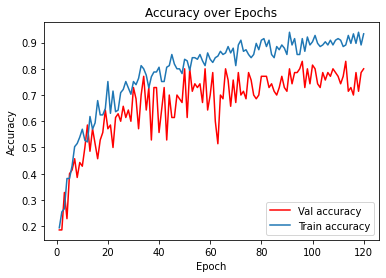

In [24]:
# Accuracies
def plot_accuracy(history3):
    train_acc = history3.history['accuracy']
    test_acc = history3.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history3)
plt.savefig('Acc_mlse_SGD_Model_03.jpg') 

In [25]:
model3.save('pokemon_model_03.h5')

### Here I used pokemon_split/test/pikachu/00000187.jpg for testing.

In [48]:
from keras.models import load_model
import cv2
import numpy as np
model3 = load_model('pokemon_model_03.h5')

class_names3=['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

model3.compile(loss='mean_squared_logarithmic_error',
              optimizer='SGD',
              metrics=['accuracy'])

img_test3 = cv2.imread('pokemon_split/test/pikachu/00000187.jpg')
img_test3 = cv2.resize(img_test3,(224,224))
img_test3 = np.reshape(img_test3,[1,224,224,3])

classes3 = np.argmax(model3.predict(img_test3), axis = -1)
names3 = [class_names3[i] for i in classes3]

print ("Who's that Pokemon!?", names3)
print ("It's in category", classes3)


Who's that Pokemon!? ['Pikachu']
It's in category [3]


# Model 4 - Fine Tuning
### mean_squared_logarithmic_error | SGD

In [27]:
from keras.applications.vgg16 import VGG16
import keras

img_height, img_width = 224,224
conv_base4 = VGG16(input_shape = (img_width, img_height, 3), weights='imagenet', include_top=False) #Training with Imagenet weights



for layer in conv_base4.layers:

  layer.trainable = False



x = Flatten()(conv_base4.output) #Output obtained on vgg16 is now flattened.
prediction = Dense(5, activation='softmax')(x) # We have 5 classes



#Creating model object

model4 = Model(inputs=conv_base4.input, outputs=prediction)



model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
#Compile the model 
model4.compile(loss='mean_squared_logarithmic_error', optimizer='SGD', metrics=['accuracy']) 
history4 = model4.fit(train_set, validation_data=val_set, epochs=50, batch_size=4)

Epoch 1/50
42/42 [==============================] - 6s 120ms/step - loss: 0.0900 - accuracy: 0.2061 - val_loss: 0.1011 - val_accuracy: 0.2143
Epoch 2/50
42/42 [==============================] - 5s 126ms/step - loss: 0.0876 - accuracy: 0.2606 - val_loss: 0.0765 - val_accuracy: 0.2714
Epoch 3/50
42/42 [==============================] - 5s 117ms/step - loss: 0.0845 - accuracy: 0.2424 - val_loss: 0.0757 - val_accuracy: 0.4000
Epoch 4/50
42/42 [==============================] - 5s 118ms/step - loss: 0.0758 - accuracy: 0.3515 - val_loss: 0.0755 - val_accuracy: 0.3143
Epoch 5/50
42/42 [==============================] - 5s 112ms/step - loss: 0.0698 - accuracy: 0.4303 - val_loss: 0.0669 - val_accuracy: 0.4143
Epoch 6/50
42/42 [==============================] - 5s 113ms/step - loss: 0.0704 - accuracy: 0.4242 - val_loss: 0.0732 - val_accuracy: 0.4000
Epoch 7/50
42/42 [==============================] - 5s 113ms/step - loss: 0.0680 - accuracy: 0.4364 - val_loss: 0.0634 - val_accuracy: 0.4429
Epoch 

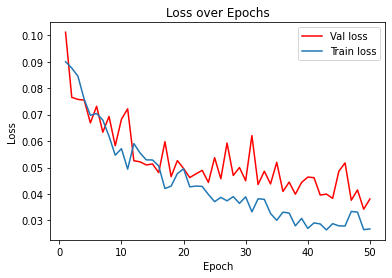

In [29]:
# Loss
def plot_loss(history4):
    train_loss = history4.history['loss']
    test_loss = history4.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history4)
plt.savefig('Loss_mlse_SGD_Model_04.jpg') 

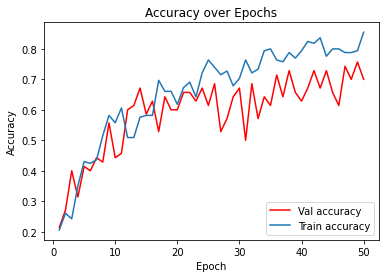

In [30]:
# Accuracies
def plot_accuracy(history4):
    train_acc = history4.history['accuracy']
    test_acc = history4.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history4)
plt.savefig('Acc_mlse_SGD_Model_04.jpg') 

In [31]:
model4.save('pokemon_model_04.h5')

### Here I used pokemon_split/test/pikachu/00000187.jpg for testing.

In [47]:
from keras.models import load_model
import cv2
import numpy as np
model4 = load_model('pokemon_model_04.h5')

class_names4=['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

model4.compile(loss='mean_squared_logarithmic_error',
              optimizer='SGD',
              metrics=['accuracy'])

img_test4 = cv2.imread('pokemon_split/test/pikachu/00000187.jpg')
img_test4 = cv2.resize(img_test4,(224,224))
img_test4 = np.reshape(img_test4,[1,224,224,3])

classes4 = np.argmax(model4.predict(img_test4), axis = -1)
names4 = [class_names4[i] for i in classes4]

print ("Who's that Pokemon!?", names4)
print ("It's in category", classes4)

Who's that Pokemon!? ['Pikachu']
It's in category [3]


### Here I used pokemon_split/test/pikachu/00000187.jpg for testing.

In [33]:
from keras.applications.vgg16 import VGG16
import keras

img_height, img_width = 224,224
conv_base4 = VGG16(input_shape = (img_width, img_height, 3), weights='imagenet', include_top=False) #Training with Imagenet weights


# layer.trainable is set to True to unfreeze the based model for fine-tuning
for layer in conv_base4.layers:

  layer.trainable = True 



x = Flatten()(conv_base4.output) #Output obtained on vgg16 is now flattened.

x = keras.layers.Dense(256, activation='relu')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes

x = keras.layers.Dense(128, activation='relu')(x)

x = keras.layers.Dense(64, activation='relu')(x)

prediction = Dense(5, activation='softmax')(x) # We have 5 classes



#Creating model object

model4 = Model(inputs=conv_base4.input, outputs=prediction)



model4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [34]:
# To check if the layer is unfreezed for fine tuning.

for i, layer in enumerate(conv_base4.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: input_5 (True)
Layer 1: block1_conv1 (True)
Layer 2: block1_conv2 (True)
Layer 3: block1_pool (True)
Layer 4: block2_conv1 (True)
Layer 5: block2_conv2 (True)
Layer 6: block2_pool (True)
Layer 7: block3_conv1 (True)
Layer 8: block3_conv2 (True)
Layer 9: block3_conv3 (True)
Layer 10: block3_pool (True)
Layer 11: block4_conv1 (True)
Layer 12: block4_conv2 (True)
Layer 13: block4_conv3 (True)
Layer 14: block4_pool (True)
Layer 15: block5_conv1 (True)
Layer 16: block5_conv2 (True)
Layer 17: block5_conv3 (True)
Layer 18: block5_pool (True)


In [35]:
#Compile the model 
model4.compile(loss='mean_squared_logarithmic_error', optimizer='SGD', metrics=['accuracy']) 
history5 = model4.fit(train_set, validation_data=val_set, epochs=50, batch_size=4)

Epoch 1/50
42/42 [==============================] - 6s 124ms/step - loss: 0.0799 - accuracy: 0.2303 - val_loss: 0.0764 - val_accuracy: 0.3143
Epoch 2/50
42/42 [==============================] - 5s 112ms/step - loss: 0.0777 - accuracy: 0.2667 - val_loss: 0.0751 - val_accuracy: 0.3714
Epoch 3/50
42/42 [==============================] - 5s 115ms/step - loss: 0.0772 - accuracy: 0.2970 - val_loss: 0.0739 - val_accuracy: 0.3571
Epoch 4/50
42/42 [==============================] - 5s 114ms/step - loss: 0.0739 - accuracy: 0.3515 - val_loss: 0.0691 - val_accuracy: 0.5571
Epoch 5/50
42/42 [==============================] - 5s 115ms/step - loss: 0.0701 - accuracy: 0.4303 - val_loss: 0.0630 - val_accuracy: 0.4857
Epoch 6/50
42/42 [==============================] - 5s 114ms/step - loss: 0.0614 - accuracy: 0.5636 - val_loss: 0.0590 - val_accuracy: 0.5286
Epoch 7/50
42/42 [==============================] - 5s 121ms/step - loss: 0.0535 - accuracy: 0.6000 - val_loss: 0.0516 - val_accuracy: 0.6571
Epoch 

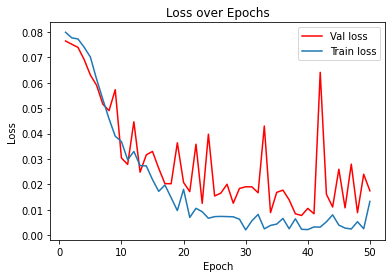

In [36]:
# Loss
def plot_loss(history5):
    train_loss = history5.history['loss']
    test_loss = history5.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
plot_loss(history5)
plt.savefig('Loss_mlse_SGD_Model_04_Finetuned.jpg') 

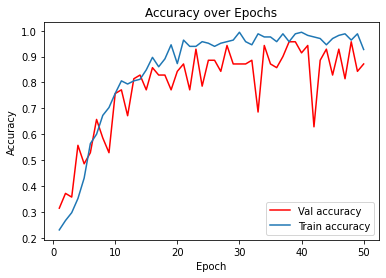

In [37]:
# Accuracies
def plot_accuracy(history5):
    train_acc = history5.history['accuracy']
    test_acc = history5.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy(history5)
plt.savefig('Acc_mlse_SGD_Model_04_Finetuned.jpg') 

In [38]:
model4.save('pokemon_model_04_Finetuned.h5')

In [46]:
from keras.models import load_model
import cv2
import numpy as np
model5 = load_model('pokemon_model_04_Finetuned.h5')

class_names5=['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

model5.compile(loss='mean_squared_logarithmic_error',
              optimizer='SGD',
              metrics=['accuracy'])

img_test5 = cv2.imread('pokemon_split/test/bulbasaur/00000070.png')
img_test5 = cv2.resize(img_test5,(224,224))
img_test5 = np.reshape(img_test5,[1,224,224,3])

classes5 = np.argmax(model5.predict(img_test5), axis = -1)
names5 = [class_names5[i] for i in classes5]

print ("Who's that Pokemon!?", names5)
print ("It's in category", classes5)

Who's that Pokemon!? ['Bulbasaur']
It's in category [0]


In [40]:
# layer.trainable is set back to freeze.
for layer in conv_base4.layers:

  layer.trainable = False

In [41]:
# To check if the layer is unfreezed for fine tuning.

for i, layer in enumerate(conv_base4.layers):
    print('Layer {}: {} ({})'.format(i, layer.name, layer.trainable))

Layer 0: input_5 (False)
Layer 1: block1_conv1 (False)
Layer 2: block1_conv2 (False)
Layer 3: block1_pool (False)
Layer 4: block2_conv1 (False)
Layer 5: block2_conv2 (False)
Layer 6: block2_pool (False)
Layer 7: block3_conv1 (False)
Layer 8: block3_conv2 (False)
Layer 9: block3_conv3 (False)
Layer 10: block3_pool (False)
Layer 11: block4_conv1 (False)
Layer 12: block4_conv2 (False)
Layer 13: block4_conv3 (False)
Layer 14: block4_pool (False)
Layer 15: block5_conv1 (False)
Layer 16: block5_conv2 (False)
Layer 17: block5_conv3 (False)
Layer 18: block5_pool (False)


## In conclusion, Model 4_Finetuned may have a decent of loss: 0.0133 - accuracy: 0.9273 - val_loss: 0.0175 - val_accuracy: 0.8714
## BUT it doesn't mean the model works well when it comes to evaluation as it predicted Falsely.
## Could have been better with larger Datasets.